<a href="https://colab.research.google.com/github/Igor-source/Made_code/blob/main/Activity_drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
import matplotlib.pyplot as plt

In [ ]:
target_sorted = pd.read_csv('/content/drive/MyDrive/Susan_project/df_1.csv')
target_sorted

,Unnamed: 0.1,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,0,0,35880,CHEMBL813748,In vivo minimum lethal dose causing lethality ...,A,BAO_0000179,BAO_0000218,organism-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,...,mg kg-1,100.000,CHEMBL612558,NaN,ADMET,NaN,MLD,mg kg-1,UO_0000308,100.000
1,1,1,35881,CHEMBL817319,In vivo toxicity in mice i.v.,T,BAO_0002117,BAO_0000218,organism-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,...,mg.kg-1,100.000,CHEMBL612558,NaN,ADMET,NaN,LD50,mg kg-1,UO_0000308,100.000
2,2,2,48940,CHEMBL676045,Minimum inhibitory concentration required for ...,F,BAO_0002146,BAO_0000218,organism-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,...,ug.mL-1,5.000,CHEMBL354,Escherichia coli,Escherichia coli,562.0,MIC,ug ml-1,UO_0000274,5.000
3,3,3,48941,CHEMBL767779,Not Plasmodium species,F,BAO_0002146,BAO_0000218,organism-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,...,ug.mL-1,512.000,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,MIC,ug ml-1,UO_0000274,512.000
4,5,5,83259,CHEMBL812362,Antibacterial activity against Streptococcus p...,F,BAO_0002146,BAO_0000218,organism-based format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,...,ug.mL-1,0.013,CHEMBL356,Streptococcus pyogenes,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26240,28336,28336,25187437,CHEMBL5291748,Binding affinity towards rat Ar in an in vitro...,B,BAO_0000186,BAO_0000357,single protein format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,...,nM,10000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,10.000
26241,28337,28337,25187577,CHEMBL5291748,Binding affinity towards rat Ar in an in vitro...,B,BAO_0000186,BAO_0000357,single protein format,NCC[C@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H]...,...,nM,10000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,10.000
26242,28338,28338,25187745,CHEMBL5291748,Binding affinity towards rat Ar in an in vitro...,B,BAO_0000186,BAO_0000357,single protein format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,...,nM,30000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,30.000
26243,28487,28487,25232855,CHEMBL5291746,Agonist activity at rat Ar in an in vitro cell...,F,BAO_0000186,BAO_0000019,assay format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,...,nM,300000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,300.000


Obtaining antibiotic samples

In [ ]:
target_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26245 entries, 0 to 26244
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               26245 non-null  int64  
 1   Unnamed: 0                 26245 non-null  int64  
 2   activity_id                26245 non-null  int64  
 3   assay_chembl_id            26245 non-null  object 
 4   assay_description          26245 non-null  object 
 5   assay_type                 26245 non-null  object 
 6   bao_endpoint               26245 non-null  object 
 7   bao_format                 26245 non-null  object 
 8   bao_label                  26245 non-null  object 
 9   canonical_smiles           26245 non-null  object 
 10  document_chembl_id         26245 non-null  object 
 11  document_journal           23786 non-null  object 
 12  document_year              23842 non-null  float64
 13  molecule_chembl_id         26245 non-null  obj

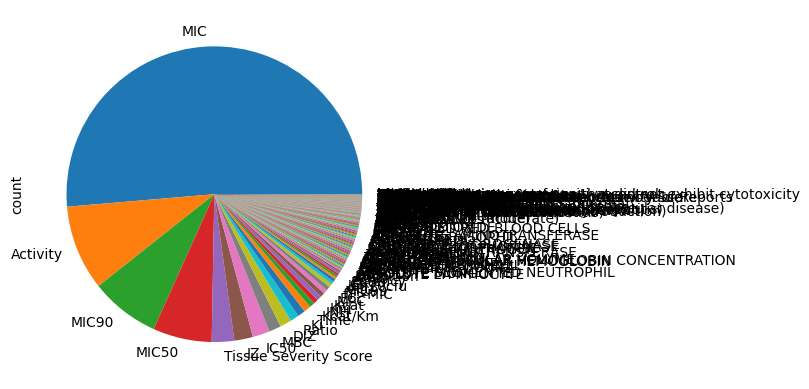

In [ ]:
target_sorted["type"].value_counts().plot.pie()
# Построение круговой диаграммы
# plt.figure(figsize=(8, 6))  # Устанавливаем размер фигуры
# value_counts.plot.pie(autopct='%1.1f%%', startangle=90)  # Круговая диаграмма
# plt.ylabel('')  # Убираем метку оси y
plt.show()  # Показываем диаграмму

In [ ]:
# Подсчитываем уникальные значения в столбце 'category'
value_counts = target_sorted['type'].value_counts()
# Выводим количество уникальных значений
display(value_counts)

,count
type,
MIC,13478
Activity,2444
MIC90,1995
MIC50,1691
Tissue Severity Score,643
...,...
RatioAUC/MIC,1
C50k,1
permeability,1


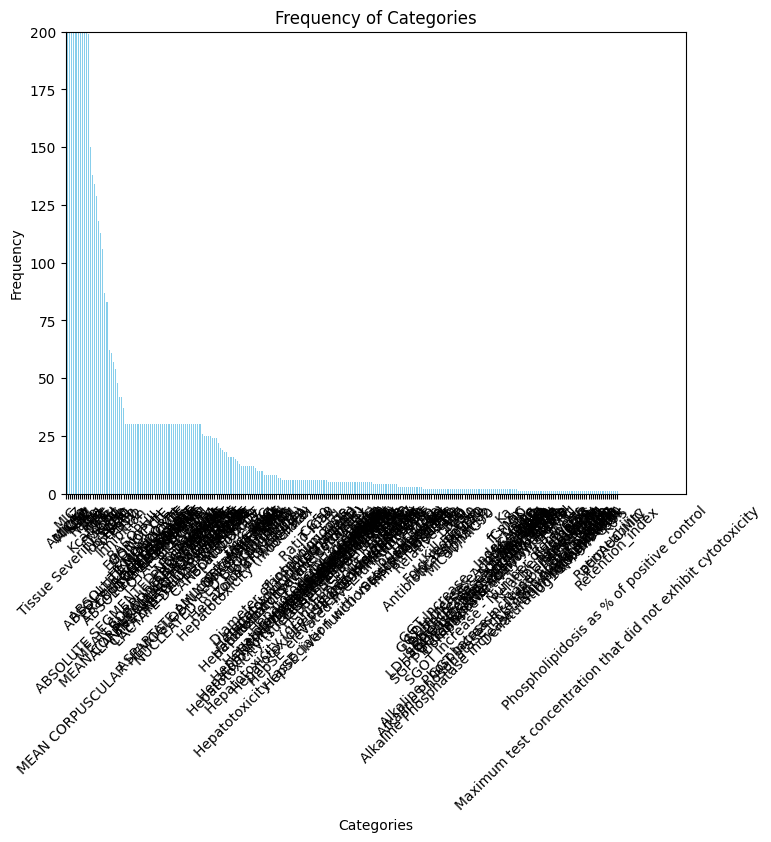

In [ ]:

# Построение столбчатой диаграммы частоты
plt.figure(figsize=(8, 6))  # Устанавливаем размер фигуры
value_counts.plot(kind='bar', color='skyblue')  # Столбчатая диаграмма
plt.title('Frequency of Categories')  # Заголовок
plt.xlabel('Categories')  # Метка оси X
plt.ylabel('Frequency')  # Метка оси Y
plt.xlim(0, 300)  # Установите пределы по оси X
plt.ylim(0, 200)
plt.xticks(rotation=45)  # Поворачиваем метки оси X для удобства чтения
plt.show()  # Показываем график

In [ ]:
# molecule = new_client.molecule
# molecule_query = molecule.search('antibiotic')
# mol_df = pd.DataFrame.from_dict(molecule_query)
# mol_df

In [ ]:
targets = new_client.activity  # Assign the 'activity' attribute of 'new_client' to the variable 'targets'
target_query = targets.search('antibiotic') # Search for entries in 'targets' that contain the term 'antibiotic' and assign the results to 'target_query'
target = pd.DataFrame.from_dict(target_query) # Convert the search results stored in 'target_query' into a pandas DataFrame and assign it to the variable 'target'
target # Output the DataFrame 'target' to display the search results


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,NA,24832617,[],CHEMBL5143208,Antibiotic activity against Candida,F,None,None,BAO_0000375,...,Candida,Candida,5475,None,None,Activity,None,None,None,None
1,None,NA,24832611,[],CHEMBL5143202,Antibiotic activity against Enterococcus faecium,F,None,None,BAO_0000375,...,Enterococcus faecium,Enterococcus faecium,1352,None,None,Activity,None,None,None,None
2,None,NA,24832612,[],CHEMBL5143203,Antibiotic activity against Staphylococcus aureus,F,None,None,BAO_0000375,...,Staphylococcus aureus,Staphylococcus aureus,1280,None,None,Activity,None,None,None,None
3,None,NA,24832618,[],CHEMBL5143209,Antibiotic activity against Mycobacterium tube...,F,None,None,BAO_0000375,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,Activity,None,None,None,None
4,None,NA,24832614,[],CHEMBL5143205,Antibiotic activity against Acinetobacter baum...,F,None,None,BAO_0000375,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,Activity,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7509,None,435054,17795015,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,1.0
7510,None,435018,17794979,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,1.0
7511,None,435020,17794981,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,1.0
7512,None,435027,17794988,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,2.0


In [ ]:
target

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,NA,24832617,[],CHEMBL5143208,Antibiotic activity against Candida,F,None,None,BAO_0000375,...,Candida,Candida,5475,None,None,Activity,None,None,None,None
1,None,NA,24832611,[],CHEMBL5143202,Antibiotic activity against Enterococcus faecium,F,None,None,BAO_0000375,...,Enterococcus faecium,Enterococcus faecium,1352,None,None,Activity,None,None,None,None
2,None,NA,24832612,[],CHEMBL5143203,Antibiotic activity against Staphylococcus aureus,F,None,None,BAO_0000375,...,Staphylococcus aureus,Staphylococcus aureus,1280,None,None,Activity,None,None,None,None
3,None,NA,24832618,[],CHEMBL5143209,Antibiotic activity against Mycobacterium tube...,F,None,None,BAO_0000375,...,Mycobacterium tuberculosis,Mycobacterium tuberculosis,1773,None,None,Activity,None,None,None,None
4,None,NA,24832614,[],CHEMBL5143205,Antibiotic activity against Acinetobacter baum...,F,None,None,BAO_0000375,...,Acinetobacter baumannii,Acinetobacter baumannii,470,None,None,Activity,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7509,None,435054,17795015,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,1.0
7510,None,435018,17794979,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,1.0
7511,None,435020,17794981,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,1.0
7512,None,435027,17794988,[],CHEMBL3889122,Inhibition Activity Assay: On the day before t...,B,None,None,BAO_0000190,...,Homo sapiens,Nerve growth factor receptor Trk-A,9606,None,None,IC50,nM,UO_0000065,None,2.0


This data was got by using script above. It has bioactivity

In [ ]:
# target = pd.read_csv('/content/drive/MyDrive/Susan_project/C__Users_Igorr_Documents_ITMO5grade_Project_with_Susan_activity_of_antibiotics.csv')
# target

In [ ]:
# i dropped the columns with value NaN
drop_columns = ['assay_variant_accession','assay_variant_mutation','text_value','toid','upper_value', 'action_type', 'activity_comment', 'data_validity_comment', 'data_validity_description','ligand_efficiency','pchembl_value','standard_text_value','standard_upper_value', 'activity_properties']
target = target.drop(columns=drop_columns)
target

KeyError: "['assay_variant_accession', 'assay_variant_mutation', 'text_value', 'toid', 'upper_value', 'action_type', 'activity_comment', 'data_validity_comment', 'data_validity_description', 'ligand_efficiency', 'pchembl_value', 'standard_text_value', 'standard_upper_value', 'activity_properties'] not found in axis"

In [ ]:
target = target.dropna(subset=['molecule_pref_name'])
# Deleting rows where the value in the target_organism column is 'Homo sapiens'
target_filtered = target[(target['target_organism'] != 'Homo sapiens') &
                         (target['target_organism'] != 'Mus musculus')]
target_filtered.reset_index(drop=True, inplace=True)
target_filtered

,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,document_journal,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,1848814,CHEMBL914565,Increase in ROS levels in Escherichia coli K12...,F,BAO_0000193,BAO_0000218,organism-based format,CN[C@@H]1[C@H](O[C@H]2[C@H](O[C@H]3[C@H](O)[C@...,CHEMBL1142094,Antimicrob Agents Chemother,...,None,0.78,CHEMBL354,Escherichia coli,Escherichia coli,562,Ratio,None,None,0.78
1,1848818,CHEMBL914565,Increase in ROS levels in Escherichia coli K12...,F,BAO_0000193,BAO_0000218,organism-based format,CNC(C)[C@@H]1CC[C@@H](N)[C@@H](O[C@H]2[C@H](O)...,CHEMBL1142094,Antimicrob Agents Chemother,...,None,1.0,CHEMBL354,Escherichia coli,Escherichia coli,562,Ratio,None,None,1.0
2,1848819,CHEMBL914565,Increase in ROS levels in Escherichia coli K12...,F,BAO_0000193,BAO_0000218,organism-based format,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,CHEMBL1142094,Antimicrob Agents Chemother,...,None,0.87,CHEMBL354,Escherichia coli,Escherichia coli,562,Ratio,None,None,0.87
3,1848815,CHEMBL914565,Increase in ROS levels in Escherichia coli K12...,F,BAO_0000193,BAO_0000218,organism-based format,CC1=CC(=O)c2ccccc2C1=O,CHEMBL1142094,Antimicrob Agents Chemother,...,None,2.02,CHEMBL354,Escherichia coli,Escherichia coli,562,Ratio,None,None,2.02
4,1848817,CHEMBL914565,Increase in ROS levels in Escherichia coli K12...,F,BAO_0000193,BAO_0000218,organism-based format,O=C(O)c1cn(C2CC2)c2cc(N3CCNCC3)c(F)cc2c1=O,CHEMBL1142094,Antimicrob Agents Chemother,...,None,1.1,CHEMBL354,Escherichia coli,Escherichia coli,562,Ratio,None,None,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,277957,CHEMBL673433,The compound was tested for inhibition of Poly...,F,BAO_0000201,BAO_0000218,organism-based format,CSC[S@@+]([O-])CC(CO)NC(=O)/C=C/c1c(C)[nH]c(=O...,CHEMBL1126976,J Med Chem,...,%,41.3,CHEMBL354,Escherichia coli,Escherichia coli,562,Inhibition,%,UO_0000187,41.3
1714,4900495,CHEMBL1614051,PUBCHEM_BIOASSAY: A Cell Based Secondary Assay...,F,BAO_0000187,BAO_0000019,assay format,CCCCCCCCCCCCCCCC[N+](C)(C)CCN(Cc1ccc(OC)cc1)c1...,CHEMBL1201862,None,...,nM,10615.0,CHEMBL612545,None,Unchecked,None,CC50,um,UO_0000065,10.615
1715,17777736,CHEMBL3888734,Enzymatic Assay: Enzymatic activity is measure...,B,BAO_0000190,BAO_0000357,single protein format,Nc1cccc2cccnc12,CHEMBL3886809,None,...,nM,79000.0,CHEMBL1287620,Mycobacterium tuberculosis,Fructose-bisphosphate aldolase,1773,IC50,nM,UO_0000065,79000.0
1716,17777735,CHEMBL3888734,Enzymatic Assay: Enzymatic activity is measure...,B,BAO_0000190,BAO_0000357,single protein format,Oc1cccc2cccnc12,CHEMBL3886809,None,...,nM,300000.0,CHEMBL1287620,Mycobacterium tuberculosis,Fructose-bisphosphate aldolase,1773,IC50,nM,UO_0000065,300000.0


In [ ]:
target_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_id                1718 non-null   int64  
 1   assay_chembl_id            1718 non-null   object 
 2   assay_description          1718 non-null   object 
 3   assay_type                 1718 non-null   object 
 4   bao_endpoint               1718 non-null   object 
 5   bao_format                 1718 non-null   object 
 6   bao_label                  1718 non-null   object 
 7   canonical_smiles           1718 non-null   object 
 8   document_chembl_id         1718 non-null   object 
 9   document_journal           1708 non-null   object 
 10  document_year              1711 non-null   float64
 11  molecule_chembl_id         1718 non-null   object 
 12  molecule_pref_name         1718 non-null   object 
 13  parent_molecule_chembl_id  1718 non-null   objec

Replace molecule_pref_name column at start of table

In [ ]:
target_sorted = target_filtered.sort_values(by='molecule_pref_name', ascending=True)
target_sorted.insert(0, 'molecule_pref_name', target_sorted.pop('molecule_pref_name'))
display(target_sorted)

,molecule_pref_name,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
547,4-HYDROXYCHALCONE,10940204,CHEMBL2049825,Antibacterial activity against methicillin-res...,F,BAO_0000179,BAO_0000218,organism-based format,O=C(/C=C/c1ccc(O)cc1)c1ccccc1,CHEMBL2046424,...,None,0.62,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,FICI,None,None,0.62
540,4-HYDROXYCHALCONE,10940203,CHEMBL2049823,Antibacterial activity against methicillin-sen...,F,BAO_0000179,BAO_0000218,organism-based format,O=C(/C=C/c1ccc(O)cc1)c1ccccc1,CHEMBL2046424,...,None,0.31,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,FICI,None,None,0.31
541,4-HYDROXYCHALCONE,10940205,CHEMBL2049826,Antibacterial activity against methicillin-res...,F,BAO_0000179,BAO_0000218,organism-based format,O=C(/C=C/c1ccc(O)cc1)c1ccccc1,CHEMBL2046424,...,None,0.25,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,FICI,None,None,0.25
1715,8-AMINOQUINOLINE,17777736,CHEMBL3888734,Enzymatic Assay: Enzymatic activity is measure...,B,BAO_0000190,BAO_0000357,single protein format,Nc1cccc2cccnc12,CHEMBL3886809,...,nM,79000.0,CHEMBL1287620,Mycobacterium tuberculosis,Fructose-bisphosphate aldolase,1773,IC50,nM,UO_0000065,79000.0
48,AMIKACIN,1833636,CHEMBL920817,Antibiotic susceptibility by resistance agains...,F,BAO_0001103,BAO_0000218,organism-based format,NCC[C@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H]...,CHEMBL1142216,...,%,90.9,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287,Activity,%,UO_0000187,90.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,VANCOMYCIN,2303169,CHEMBL1004064,Antimicrobial activity against methicillin-res...,F,BAO_0002146,BAO_0000218,organism-based format,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,CHEMBL1137665,...,ug.mL-1,1.0,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,MIC,ug ml-1,UO_0000274,1.0
624,VANCOMYCIN,3543146,CHEMBL1283220,Bactericidal activity against vancomycin-resis...,F,BAO_0000179,BAO_0000218,organism-based format,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,CHEMBL1275598,...,ug ml-1,64.0,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,MBC,ug ml-1,UO_0000274,64.0
1102,VANCOMYCIN,2303185,CHEMBL1000558,Antimicrobial activity against vancomycin-inte...,F,BAO_0002146,BAO_0000218,organism-based format,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,CHEMBL1137665,...,ug.mL-1,2.0,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,MIC,ug ml-1,UO_0000274,2.0
302,VANCOMYCIN,23190102,CHEMBL4818434,Antimicrobial activity against antibiotic-resi...,F,BAO_0002146,BAO_0000218,organism-based format,CN[C@H](CC(C)C)C(=O)N[C@H]1C(=O)N[C@@H](CC(N)=...,CHEMBL4814057,...,ug.mL-1,0.78,CHEMBL352,Staphylococcus aureus,Staphylococcus aureus,1280,MIC,ug ml-1,UO_0000274,0.78


In [ ]:
target_sorted.to_csv('/content/drive/MyDrive/Susan_project/target_sorted.csv')
target_sorted.to_excel('/content/drive/MyDrive/Susan_project/target_sorted.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Предположим, что идентификаторы находятся в столбце с именем 'ChEMBL_ID'
chembl_ids = set(target_sorted['molecule_chembl_id'].tolist())
chembl_ids_list = list(chembl_ids)
len(chembl_ids_list)
display(len(chembl_ids_list))
chembl_10 = chembl_ids_list[:10]
chembl_10
# # Создаем объект ресурса
# compounds = new_client.molecule

# # Получаем информацию о соединениях
# compounds_info = [compounds.get(chembl_id) for chembl_id in chembl_ids]

96

['CHEMBL3989915',
 'CHEMBL460434',
 'CHEMBL184618',
 'CHEMBL1802158',
 'CHEMBL501122',
 'CHEMBL1802160',
 'CHEMBL466575',
 'CHEMBL1441',
 'CHEMBL1560',
 'CHEMBL1630575']

In [ ]:
# Создаем объект ресурса
activity = new_client.activity
res = activity.filter(molecule_chembl_id__in=chembl_10).only('molecule_chembl_id', 'standard_value', 'type')
df_2 = pd.DataFrame(res)
display(df_2)

,molecule_chembl_id,standard_value,type,value
0,CHEMBL1560,2.69,Log K',2.69
1,CHEMBL374478,-30.0,Activity,-30.0
2,CHEMBL374478,-31.0,Activity,-31.0
3,CHEMBL374478,-27.0,Activity,-27.0
4,CHEMBL374478,0.003,MIC,0.003
...,...,...,...,...
22689,CHEMBL158,400000.0,AC50,400.0
22690,CHEMBL158,400000.0,AC50,400.0
22691,CHEMBL158,400000.0,AC50,400.0
22692,CHEMBL374478,30000.0,AC50,30.0


In [ ]:
# Создаем объект ресурса
activity = new_client.activity

# # Получаем информацию о соединениях с фильтром по стандартному типу IC50
# res = activity.filter(molecule_chembl_id__in=chembl_ids_list)

# # Преобразуем результат в DataFrame
# df_1 = pd.DataFrame(res)


res = activity.filter(molecule_chembl_id__in=chembl_10)
df_1 = pd.DataFrame(res)
# Выводим первые 3 строки таблицы
display(df_1)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,35880,[],CHEMBL813748,In vivo minimum lethal dose causing lethality ...,A,None,None,BAO_0000179,...,None,ADMET,None,None,NaN,MLD,mg kg-1,UO_0000308,None,100.0
1,None,None,35881,[],CHEMBL817319,In vivo toxicity in mice i.v.,T,None,None,BAO_0002117,...,None,ADMET,None,None,NaN,LD50,mg kg-1,UO_0000308,None,100.0
2,None,None,48940,[],CHEMBL676045,Minimum inhibitory concentration required for ...,F,None,None,BAO_0002146,...,Escherichia coli,Escherichia coli,562,None,NaN,MIC,ug ml-1,UO_0000274,None,5.0
3,None,None,48941,[],CHEMBL767779,Not Plasmodium species,F,None,None,BAO_0002146,...,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287,None,NaN,MIC,ug ml-1,UO_0000274,None,512.0
4,None,None,53480,[],CHEMBL702885,Binding constant against human serum albumin (...,B,None,None,BAO_0000179,...,Homo sapiens,Serum albumin,9606,None,NaN,Log K',None,None,None,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28494,None,Summarised AC50 (mean value for measurements w...,25234078,[],CHEMBL5291796,Agonist activity at human GABRA1 in an in vitr...,F,None,None,BAO_0000186,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606,None,NaN,AC50,uM,UO_0000065,None,30.0
28495,None,Summarised AC50 (mean value for measurements w...,25234203,[],CHEMBL5291796,Agonist activity at human GABRA1 in an in vitr...,F,None,None,BAO_0000186,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606,None,NaN,AC50,uM,UO_0000065,None,30.0
28496,None,Summarised AC50 (mean value for measurements w...,25234370,[],CHEMBL5291797,Antagonist activity at human GABRA1 in an in v...,F,None,None,BAO_0000186,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606,None,NaN,AC50,uM,UO_0000065,None,300.0
28497,None,Summarised AC50 (mean value for measurements w...,25234375,[],CHEMBL5291797,Antagonist activity at human GABRA1 in an in v...,F,None,None,BAO_0000186,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606,None,NaN,AC50,uM,UO_0000065,None,30.0


In [ ]:
df_1.info()

NameError: name 'df_1' is not defined

In [ ]:
df_1.to_csv('/content/drive/MyDrive/Susan_project/df_1.csv')
df_1.to_excel('/content/drive/MyDrive/Susan_project/df_1.xlsx')

In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/Susan_project/df_1.csv')
df_1

<ipython-input-47-30470f7ed972>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1 = pd.read_csv('/content/drive/MyDrive/Susan_project/df_1.csv')


,Unnamed: 0,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,0,NaN,NaN,35880,[],CHEMBL813748,In vivo minimum lethal dose causing lethality ...,A,NaN,NaN,...,NaN,ADMET,NaN,NaN,NaN,MLD,mg kg-1,UO_0000308,NaN,100.00
1,1,NaN,NaN,35881,[],CHEMBL817319,In vivo toxicity in mice i.v.,T,NaN,NaN,...,NaN,ADMET,NaN,NaN,NaN,LD50,mg kg-1,UO_0000308,NaN,100.00
2,2,NaN,NaN,48940,[],CHEMBL676045,Minimum inhibitory concentration required for ...,F,NaN,NaN,...,Escherichia coli,Escherichia coli,562.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,5.00
3,3,NaN,NaN,48941,[],CHEMBL767779,Not Plasmodium species,F,NaN,NaN,...,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,NaN,NaN,MIC,ug ml-1,UO_0000274,NaN,512.00
4,4,NaN,NaN,53480,[],CHEMBL702885,Binding constant against human serum albumin (...,B,NaN,NaN,...,Homo sapiens,Serum albumin,9606.0,NaN,NaN,Log K',NaN,NaN,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28494,28494,NaN,Summarised AC50 (mean value for measurements w...,25234078,[],CHEMBL5291796,Agonist activity at human GABRA1 in an in vitr...,F,NaN,NaN,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,NaN,NaN,AC50,uM,UO_0000065,NaN,30.00
28495,28495,NaN,Summarised AC50 (mean value for measurements w...,25234203,[],CHEMBL5291796,Agonist activity at human GABRA1 in an in vitr...,F,NaN,NaN,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,NaN,NaN,AC50,uM,UO_0000065,NaN,30.00
28496,28496,NaN,Summarised AC50 (mean value for measurements w...,25234370,[],CHEMBL5291797,Antagonist activity at human GABRA1 in an in v...,F,NaN,NaN,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,NaN,NaN,AC50,uM,UO_0000065,NaN,300.00
28497,28497,NaN,Summarised AC50 (mean value for measurements w...,25234375,[],CHEMBL5291797,Antagonist activity at human GABRA1 in an in v...,F,NaN,NaN,...,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,NaN,NaN,AC50,uM,UO_0000065,NaN,30.00


In [ ]:
# i dropped the columns with value NaN
df_1 = df_1.drop(columns=drop_columns)
df_1

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,0,35880,CHEMBL813748,In vivo minimum lethal dose causing lethality ...,A,BAO_0000179,BAO_0000218,organism-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL1136163,...,mg kg-1,100.00,CHEMBL612558,NaN,ADMET,NaN,MLD,mg kg-1,UO_0000308,100.00
1,1,35881,CHEMBL817319,In vivo toxicity in mice i.v.,T,BAO_0002117,BAO_0000218,organism-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL1136163,...,mg.kg-1,100.00,CHEMBL612558,NaN,ADMET,NaN,LD50,mg kg-1,UO_0000308,100.00
2,2,48940,CHEMBL676045,Minimum inhibitory concentration required for ...,F,BAO_0002146,BAO_0000218,organism-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,CHEMBL1123193,...,ug.mL-1,5.00,CHEMBL354,Escherichia coli,Escherichia coli,562.0,MIC,ug ml-1,UO_0000274,5.00
3,3,48941,CHEMBL767779,Not Plasmodium species,F,BAO_0002146,BAO_0000218,organism-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,CHEMBL1123193,...,ug.mL-1,512.00,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,MIC,ug ml-1,UO_0000274,512.00
4,4,53480,CHEMBL702885,Binding constant against human serum albumin (...,B,BAO_0000179,BAO_0000357,single protein format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL1134302,...,NaN,0.14,CHEMBL3253,Homo sapiens,Serum albumin,9606.0,Log K',NaN,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28494,28494,25234078,CHEMBL5291796,Agonist activity at human GABRA1 in an in vitr...,F,BAO_0000186,BAO_0000219,cell-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,CHEMBL5291721,...,nM,30000.00,CHEMBL5303741,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,AC50,uM,UO_0000065,30.00
28495,28495,25234203,CHEMBL5291796,Agonist activity at human GABRA1 in an in vitr...,F,BAO_0000186,BAO_0000219,cell-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL5291721,...,nM,30000.00,CHEMBL5303741,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,AC50,uM,UO_0000065,30.00
28496,28496,25234370,CHEMBL5291797,Antagonist activity at human GABRA1 in an in v...,F,BAO_0000186,BAO_0000219,cell-based format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,CHEMBL5291721,...,nM,300000.00,CHEMBL5303741,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,AC50,uM,UO_0000065,300.00
28497,28497,25234375,CHEMBL5291797,Antagonist activity at human GABRA1 in an in v...,F,BAO_0000186,BAO_0000219,cell-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,CHEMBL5291721,...,nM,30000.00,CHEMBL5303741,Homo sapiens,Gamma-aminobutyric acid receptor subunit alpha...,9606.0,AC50,uM,UO_0000065,30.00


In [ ]:
df_1 = df_1[df_1['target_organism'] != 'Homo sapiens']
df_1

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_units,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value
0,0,35880,CHEMBL813748,In vivo minimum lethal dose causing lethality ...,A,BAO_0000179,BAO_0000218,organism-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL1136163,...,mg kg-1,100.000,CHEMBL612558,NaN,ADMET,NaN,MLD,mg kg-1,UO_0000308,100.000
1,1,35881,CHEMBL817319,In vivo toxicity in mice i.v.,T,BAO_0002117,BAO_0000218,organism-based format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL1136163,...,mg.kg-1,100.000,CHEMBL612558,NaN,ADMET,NaN,LD50,mg kg-1,UO_0000308,100.000
2,2,48940,CHEMBL676045,Minimum inhibitory concentration required for ...,F,BAO_0002146,BAO_0000218,organism-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,CHEMBL1123193,...,ug.mL-1,5.000,CHEMBL354,Escherichia coli,Escherichia coli,562.0,MIC,ug ml-1,UO_0000274,5.000
3,3,48941,CHEMBL767779,Not Plasmodium species,F,BAO_0002146,BAO_0000218,organism-based format,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=...,CHEMBL1123193,...,ug.mL-1,512.000,CHEMBL348,Pseudomonas aeruginosa,Pseudomonas aeruginosa,287.0,MIC,ug ml-1,UO_0000274,512.000
5,5,83259,CHEMBL812362,Antibacterial activity against Streptococcus p...,F,BAO_0002146,BAO_0000218,organism-based format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,CHEMBL1136553,...,ug.mL-1,0.013,CHEMBL356,Streptococcus pyogenes,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28336,28336,25187437,CHEMBL5291748,Binding affinity towards rat Ar in an in vitro...,B,BAO_0000186,BAO_0000357,single protein format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,CHEMBL5291721,...,nM,10000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,10.000
28337,28337,25187577,CHEMBL5291748,Binding affinity towards rat Ar in an in vitro...,B,BAO_0000186,BAO_0000357,single protein format,NCC[C@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H]...,CHEMBL5291721,...,nM,10000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,10.000
28338,28338,25187745,CHEMBL5291748,Binding affinity towards rat Ar in an in vitro...,B,BAO_0000186,BAO_0000357,single protein format,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL5291721,...,nM,30000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,30.000
28487,28487,25232855,CHEMBL5291746,Agonist activity at rat Ar in an in vitro cell...,F,BAO_0000186,BAO_0000019,assay format,C[C@@H](O)[C@H]1C(=O)N2C(C(=O)O)=C(S[C@@H]3CN[...,CHEMBL5291721,...,nM,300000.000,CHEMBL3072,Rattus norvegicus,Androgen Receptor,10116.0,AC50,uM,UO_0000065,300.000


In [ ]:
df_1.to_csv('/content/drive/MyDrive/Susan_project/df_1.csv')
df_1.to_excel('/content/drive/MyDrive/Susan_project/df_1.xlsx')

In [ ]:

column_names = df_1.columns.tolist()
print(column_names)


['Unnamed: 0', 'activity_id', 'assay_chembl_id', 'assay_description', 'assay_type', 'bao_endpoint', 'bao_format', 'bao_label', 'canonical_smiles', 'document_chembl_id', 'document_journal', 'document_year', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id', 'standard_flag', 'standard_relation', 'standard_type', 'standard_units', 'standard_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'type', 'units', 'uo_units', 'value']


In [ ]:
taipe = df_1['type'].str.lower().unique().tolist()

print(len(taipe))
taipe

263


['mld',
 'ld50',
 'mic',
 'relative t1/2',
 't1/2',
 'auc',
 'cl',
 'pd50',
 'ic50',
 'imbalance',
 't/c',
 'zone of inhibition',
 'c50',
 'uptake at c50',
 'kill at c50',
 'ld90',
 'ratio',
 'log 1/c',
 'min concentration',
 'mic50',
 'mic90',
 'ed50',
 'no. of survivors',
 'survival',
 'mid',
 'fold_reduction',
 'activity',
 'log beta3',
 'pmic',
 'mean log d',
 'concentration',
 'dhp-i stability',
 'stability',
 'cmax',
 't max',
 'recovery',
 'mic50/mic90',
 'anticonvulsant activity',
 'ur',
 'inhibition',
 'denaturation rate constant',
 'mic70',
 'ic0',
 'ic100',
 'antibiotic resistance',
 'mic80',
 'cmi',
 'f',
 'i50',
 'relative hydrolysis',
 '-log mic',
 'pka2',
 'logd',
 'pka1',
 'lysis diameter',
 'susceptibility',
 'kd',
 'frel',
 'log10 cfu',
 'km',
 'post antibiotic effe',
 'kcat/km',
 'iz',
 'fauc/mic',
 'ft>mic',
 'ad50',
 'mbc',
 'mfc',
 'ec50',
 'cc25',
 'mpc',
 'cfu',
 'kcat',
 'diameter of inhibition zone',
 'cmin',
 'vmax',
 'pic50(mm)',
 'ki',
 'drug uptake',
 'del